# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 587


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# https://openweathermap.org/current#name
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=imperial&appid="+ weather_api_key

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city #&q is used to join url and api query
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | ust-nera
Processing Record 2 of Set 1 | college
Processing Record 3 of Set 1 | eyl
Processing Record 4 of Set 1 | port mathurin
Processing Record 5 of Set 1 | ilulissat
Processing Record 6 of Set 1 | alofi
Processing Record 7 of Set 1 | albany
Processing Record 8 of Set 1 | igarka
Processing Record 9 of Set 1 | along
Processing Record 10 of Set 1 | esquel
Processing Record 11 of Set 1 | invercargill
Processing Record 12 of Set 1 | kingston
Processing Record 13 of Set 1 | canutama
Processing Record 14 of Set 1 | edinburgh of the seven seas
Processing Record 15 of Set 1 | willowmore
Processing Record 16 of Set 1 | bethel
Processing Record 17 of Set 1 | nchelenge
Processing Record 18 of Set 1 | port douglas
Processing Record 19 of Set 1 | palembang
Processing Record 20 of Set 1 | puerto natales
Processing Record 21 of Set 1 | port elizabeth
Processing Record 22 of Set 1 | lebu
Processing Record 23 o

Processing Record 43 of Set 4 | cargados carajos
City not found. Skipping...
Processing Record 44 of Set 4 | inhambane
Processing Record 45 of Set 4 | hoxtolgay
City not found. Skipping...
Processing Record 46 of Set 4 | lulea
Processing Record 47 of Set 4 | poli
Processing Record 48 of Set 4 | port hedland
Processing Record 49 of Set 4 | farmington
Processing Record 0 of Set 5 | rio verde de mato grosso
Processing Record 1 of Set 5 | hadibu
Processing Record 2 of Set 5 | dubbo
Processing Record 3 of Set 5 | tarakan
Processing Record 4 of Set 5 | lompoc
Processing Record 5 of Set 5 | yanam
Processing Record 6 of Set 5 | ourilandia do norte
City not found. Skipping...
Processing Record 7 of Set 5 | sur
Processing Record 8 of Set 5 | alice springs
Processing Record 9 of Set 5 | cole harbour
Processing Record 10 of Set 5 | iwaki
Processing Record 11 of Set 5 | richmond
Processing Record 12 of Set 5 | vilyuchinsk
Processing Record 13 of Set 5 | deschutes river woods
Processing Record 14 of

Processing Record 30 of Set 8 | magadan
Processing Record 31 of Set 8 | selfoss
Processing Record 32 of Set 8 | queenstown
Processing Record 33 of Set 8 | la ligua
Processing Record 34 of Set 8 | nadym
Processing Record 35 of Set 8 | namanga
Processing Record 36 of Set 8 | tyukhtet
Processing Record 37 of Set 8 | stony plain
Processing Record 38 of Set 8 | port lincoln
Processing Record 39 of Set 8 | hasaki
Processing Record 40 of Set 8 | oriximina
Processing Record 41 of Set 8 | aldama
Processing Record 42 of Set 8 | fort bragg
Processing Record 43 of Set 8 | gazojak
Processing Record 44 of Set 8 | happy valley-goose bay
Processing Record 45 of Set 8 | sola
Processing Record 46 of Set 8 | prado
Processing Record 47 of Set 8 | bechar
Processing Record 48 of Set 8 | playa del ingles
Processing Record 49 of Set 8 | valparaiso
Processing Record 0 of Set 9 | dadukou
Processing Record 1 of Set 9 | yarmouth
Processing Record 2 of Set 9 | petropavlovsk-kamchatsky
Processing Record 3 of Set 9 

Processing Record 20 of Set 12 | chiili
City not found. Skipping...
Processing Record 21 of Set 12 | nyurba
Processing Record 22 of Set 12 | borogontsy
Processing Record 23 of Set 12 | jaen
Processing Record 24 of Set 12 | luwuk
Processing Record 25 of Set 12 | tadine
Processing Record 26 of Set 12 | rudbar
Processing Record 27 of Set 12 | turan
Processing Record 28 of Set 12 | kalmunai
Processing Record 29 of Set 12 | grand rapids
Processing Record 30 of Set 12 | kone
Processing Record 31 of Set 12 | emerald
Processing Record 32 of Set 12 | gela
Processing Record 33 of Set 12 | mossel bay
Processing Record 34 of Set 12 | teknaf
Processing Record 35 of Set 12 | jonuta
Processing Record 36 of Set 12 | ar ruways
-----------------------------
Data Retrieval Complete      
-----------------------------


In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          561
Lat           561
Lng           561
Max Temp      561
Humidity      561
Cloudiness    561
Wind Speed    561
Country       561
Date          561
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,ust-nera,64.5667,143.2000,19.22,96,94,4.00,RU,1696897050
1,college,64.8569,-147.8028,33.75,76,100,8.05,US,1696897050
2,eyl,7.9803,49.8164,79.56,80,90,9.24,SO,1696897051
3,port mathurin,-19.6833,63.4167,74.52,78,57,17.05,MU,1696897051
4,ilulissat,69.2167,-51.1000,28.42,64,100,10.36,GL,1696897051


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,ust-nera,64.5667,143.2000,19.22,96,94,4.00,RU,1696897050
1,college,64.8569,-147.8028,33.75,76,100,8.05,US,1696897050
2,eyl,7.9803,49.8164,79.56,80,90,9.24,SO,1696897051
3,port mathurin,-19.6833,63.4167,74.52,78,57,17.05,MU,1696897051
4,ilulissat,69.2167,-51.1000,28.42,64,100,10.36,GL,1696897051


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

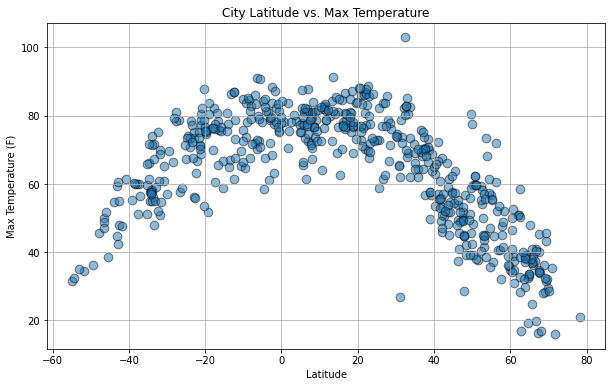

In [21]:
# Set a size for all figures
from matplotlib import rc_params as rc_params
plt.rcParams['figure.figsize'] = [10, 6]

# Build scatter plot for latitude vs. temperature
plt.scatter(     
    city_data_df["Lat"],
    city_data_df["Max Temp"],
    edgecolor="black",
    marker="o",
    s=75,
    alpha=0.5,
    label="Cities"
)

plt.title("City Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

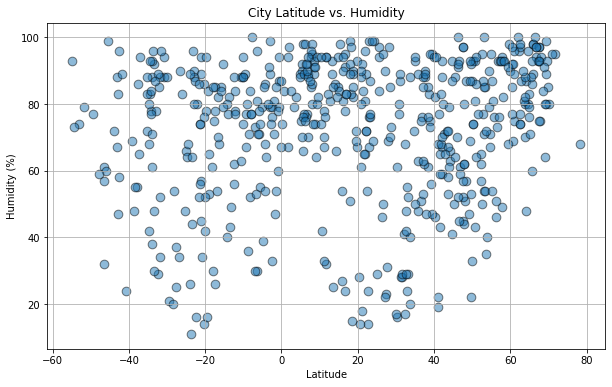

In [23]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(     
    city_data_df["Lat"],
    city_data_df["Humidity"],
    edgecolor="black",
    marker="o", 
    s=75,
    alpha=0.5,
    label="Cities"
)

plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

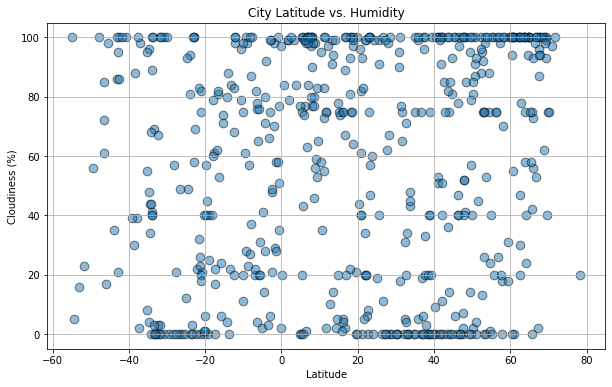

In [25]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(     
    city_data_df["Lat"],
    city_data_df["Cloudiness"],
    edgecolor="black",
    marker="o", 
    s=75,
    alpha=0.5,
    label="Cities"
)

plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)
# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

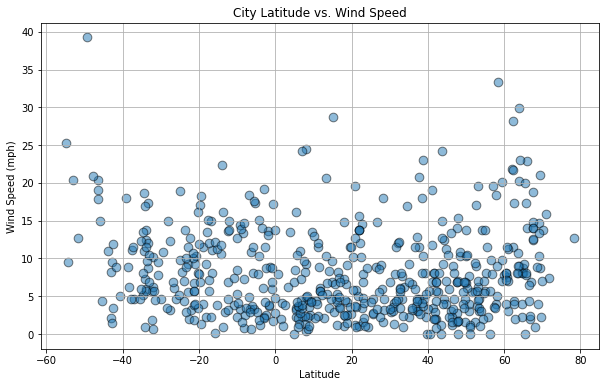

In [26]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(     
    city_data_df["Lat"],
    city_data_df["Wind Speed"],
    edgecolor="black",
    marker="o", 
    s=75,
    alpha=0.5,
    label="Cities"
)

plt.title("City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(True)
# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,faya,18.3851,42.4509,22.06,35,21,2.60,SA,1666108228
1,farsund,58.0948,6.8047,13.30,100,0,7.65,NO,1666108228
3,jamestown,42.0970,-79.2353,5.77,77,100,9.77,US,1666107934
4,lanzhou,36.0564,103.7922,14.53,48,59,1.20,CN,1666108230
6,albany,42.6001,-73.9662,10.36,74,29,2.10,US,1666108231


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,new norfolk,-42.7826,147.0587,11.72,58,12,1.34,AU,1666108230
5,ushuaia,-54.8000,-68.3000,8.81,81,75,3.09,AR,1666108231
7,carnarvon,-24.8667,113.6333,20.02,76,0,7.46,AU,1666108232
9,saint-pierre,-21.3393,55.4781,22.82,68,0,5.14,RE,1666108236
10,colorado,-22.8375,-51.9731,20.36,86,96,4.69,BR,1666107965


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.7161472181434118


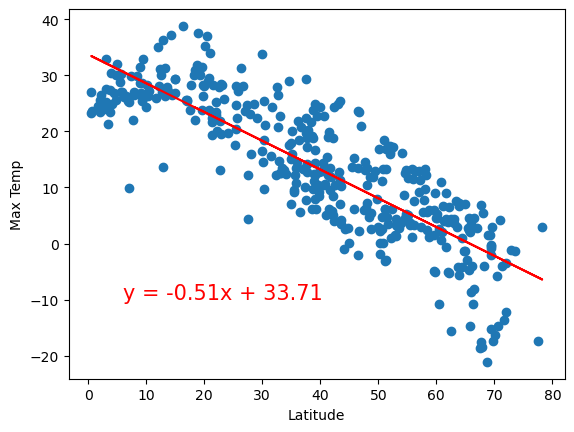

In [15]:
# Linear regression on Northern Hemisphere
# YOUR CODE HERE

The r-value is: 0.4121057168607245


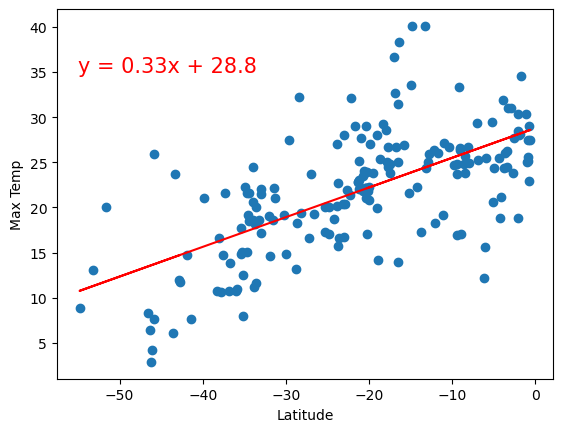

In [16]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.05689741545789598


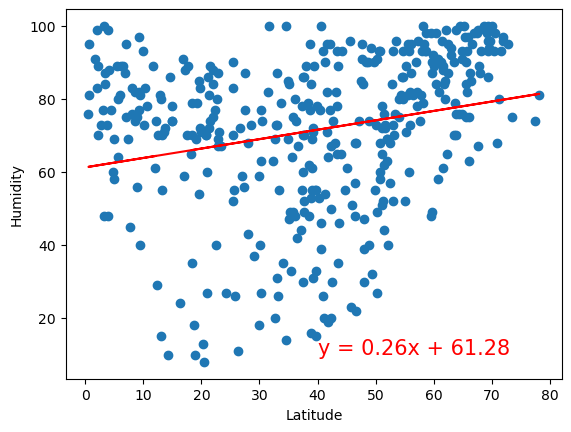

In [17]:
# Northern Hemisphere
# YOUR CODE HERE

The r-value is: 0.0002808747046324607


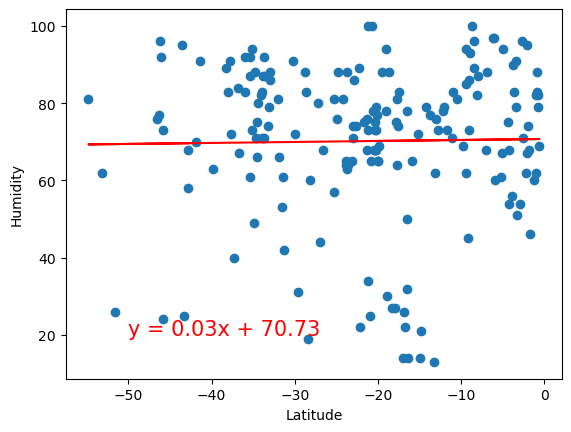

In [18]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.024026517125811015


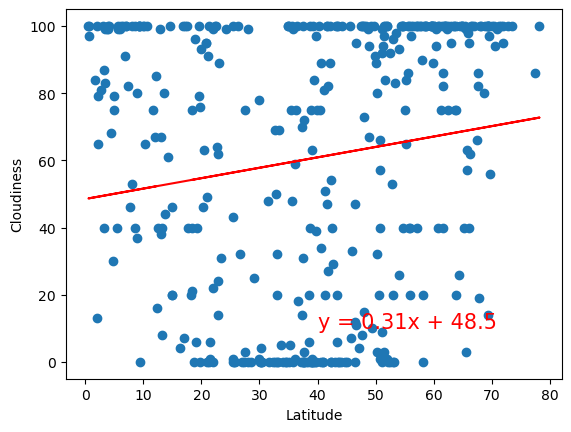

In [19]:
# Northern Hemisphere
# YOUR CODE HERE

The r-value is: 0.02056735429994368


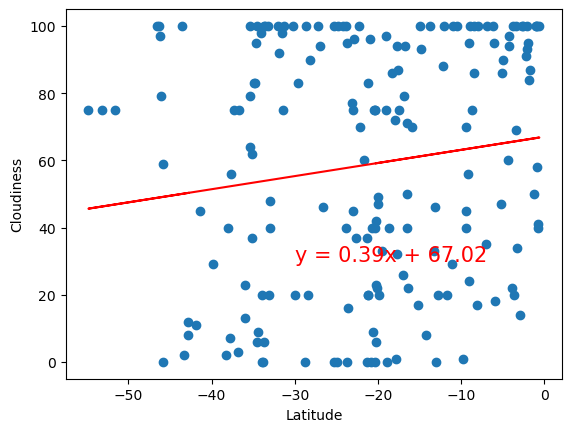

In [20]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.030396762354449467


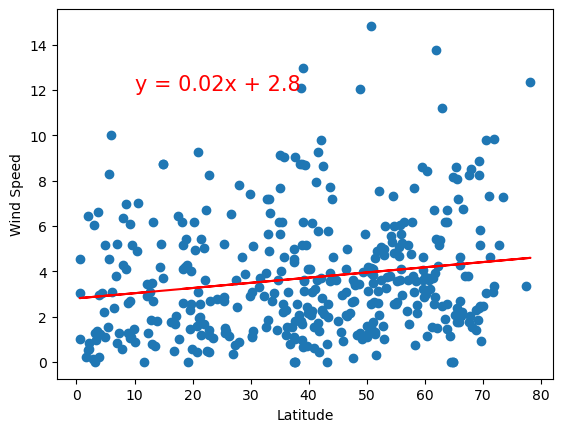

In [21]:
# Northern Hemisphere
# YOUR CODE HERE

The r-value is: 0.062239040700515696


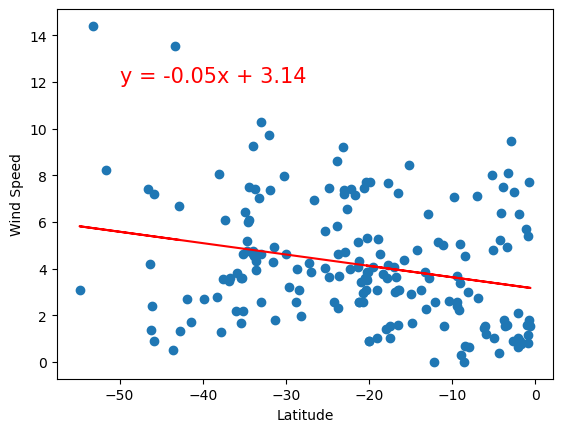

In [22]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE